In [2]:
import pandas as pd

In [4]:
df23_24 = pd.read_csv("2023-24 Advanced Stats.xlsx - Sheet1.csv")
dpoy_df = pd.read_csv("dpoyVoting.csv")

In [6]:
dpoy_df.head()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,STL,BLK,FG%,3P%,FT%,WS,WS/48,DWS,DBPM,DRtg
0,1,Rudy Gobert,31,MIN,72,433,495,0.875,76,34.1,...,0.7,2.1,0.661,0.000,0.638,11.6,0.216,5.8,1.7,104
1,2,Victor Wembanyama,20,SAS,19,245,495,0.495,71,29.7,...,1.2,3.6,0.465,0.325,0.796,3.7,0.085,4.4,3.3,106
2,3,Bam Adebayo,26,MIA,3,91,495,0.184,71,34.0,...,1.1,0.9,0.521,0.357,0.755,7.2,0.144,4.3,1.7,109
3,4,Anthony Davis,30,LAL,4,83,495,0.168,76,35.5,...,1.2,2.3,0.556,0.271,0.816,11.8,0.210,4.7,1.7,109
4,5,Herbert Jones,25,NOP,0,14,495,0.028,76,30.5,...,1.4,0.8,0.498,0.418,0.867,6.3,0.131,3.0,1.5,113


In [8]:
df23_24.head()

,Player,Age,Team,Pos,G,GS,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Awards,Player-additional
0,Dereck Lively II,19,DAL,C,55,42,1294,18.1,0.728,0.007,...,3.1,1.8,4.9,0.183,-0.3,0.8,0.5,0.8,ROY-6,livelde01
1,Brandin Podziemski,20,GSW,SG,74,28,1968,13.0,0.540,0.392,...,2.1,2.0,4.1,0.100,-0.5,0.4,-0.1,0.9,ROY-5,podzibr01
2,Jaime Jaquez Jr.,22,MIA,SF,75,20,2113,12.9,0.574,0.290,...,1.4,2.7,4.0,0.092,-2.2,0.3,-1.9,0.1,ROY-46MOY-9,jaqueja01
3,Brandon Miller,21,CHO,SF,74,68,2383,13.0,0.552,0.455,...,-0.3,1.0,0.8,0.015,-0.9,-1.6,-2.6,-0.3,ROY-3,millebr02
4,Chet Holmgren,21,OKC,C,82,82,2413,20.4,0.632,0.366,...,4.6,4.4,8.9,0.178,1.8,1.5,3.4,3.3,ROY-2,holmgch01


In [12]:
df23_24 = df23_24[df23_24['MP'] >= 1500] # filter out players who have played less
df23_24 = df23_24.copy()

In [14]:
df23_24.columns

Index(['Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Awards',
       'Player-additional'],
      dtype='object')

In [16]:
defensive_stats = ['STL%', 'BLK%', 'DRB%', 'DBPM', 'DWS', 'BPM']

df23_24[defensive_stats] = df23_24[defensive_stats].apply(pd.to_numeric, errors = 'coerce')

In [18]:
import numpy as np

In [20]:
weights = {
    'STL%': 0.3,  # Steals are crucial
    'BLK%': 0.3,  # Blocks are equally important
    'DRB%': 0.1,  # Defensive rebounding helps, but less so than steals/blocks
    'DBPM': 0.15, # Defensive impact metric
    'DWS': 0.1,   # Defensive win shares
    'BPM': 0.05   # Overall impact, minor contribution   
}

In [22]:
df23_24['DPOY_Score'] = sum(df23_24[stat] * weight for stat, weight in weights.items())

In [24]:
df23_24.sort_values(by = 'DPOY_Score', ascending=False).head(10)

,Player,Age,Team,Pos,G,GS,MP,PER,TS%,3PAr,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Awards,Player-additional,DPOY_Score
5,Victor Wembanyama,20,SAS,C,71,71,2106,23.1,0.565,0.332,...,4.4,3.7,0.085,1.9,3.3,5.2,3.8,ROY-1DPOY-2,wembavi01,7.865
19,Anthony Davis,30,LAL,C,76,76,2700,25.8,0.621,0.083,...,4.7,11.8,0.210,3.5,1.7,5.1,4.9,DPOY-4ASNBA2,davisan02,6.000
14,Nikola Jokić,28,DEN,C,79,79,2737,31.0,0.650,0.164,...,5.1,17.0,0.299,9.0,4.2,13.2,10.6,MVP-1CPOY-4ASNBA1,jokicni01,5.990
24,Rudy Gobert,31,MIN,C,76,76,2593,19.3,0.675,0.005,...,5.8,11.6,0.216,0.1,1.7,1.8,2.5,DPOY-1,goberru01,5.795
4,Chet Holmgren,21,OKC,C,82,82,2413,20.4,0.632,0.366,...,4.4,8.9,0.178,1.8,1.5,3.4,3.3,ROY-2,holmgch01,5.665
100,Nic Claxton,24,BRK,C,71,71,2116,18.7,0.629,0.009,...,3.2,6.7,0.152,-0.3,1.5,1.2,1.7,NaN,claxtni01,5.525
148,Daniel Gafford,25,2TM,PF,74,66,1815,21.7,0.731,0.000,...,2.5,7.8,0.205,0.7,1.9,2.6,2.1,NaN,gaffoda01,5.515
104,Jusuf Nurkić,29,PHO,C,76,76,2078,17.4,0.559,0.144,...,3.8,5.8,0.133,-1.0,2.1,1.1,1.6,NaN,nurkiju01,5.510
132,Isaiah Hartenstein,25,NYK,C,75,49,1896,18.9,0.670,0.008,...,3.5,8.1,0.204,0.7,2.8,3.5,2.6,NaN,harteis01,5.165
11,Giannis Antetokounmpo,29,MIL,PF,73,73,2567,29.9,0.649,0.091,...,3.7,13.2,0.246,6.7,2.4,9.0,7.2,MVP-4DPOY-9CPOY-12ASNBA1,antetgi01,5.140


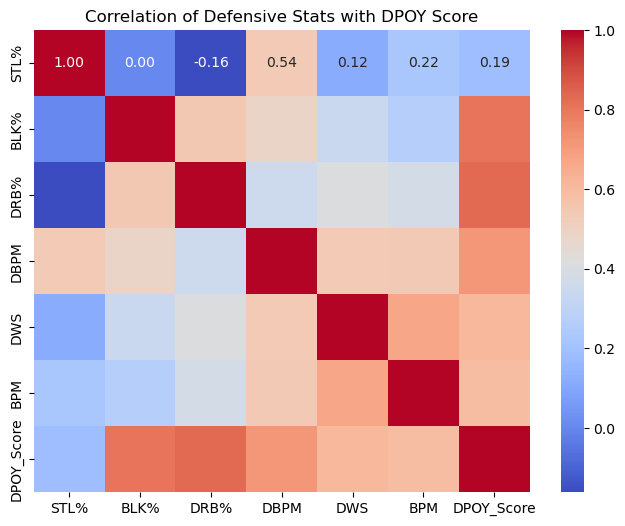

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df23_24[['STL%', 'BLK%', 'DRB%', 'DBPM', 'DWS', 'BPM', 'DPOY_Score']].corr()

# Visualize correlations
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Defensive Stats with DPOY Score")
plt.show()


In [29]:
from sklearn.linear_model import LinearRegression

In [31]:
dpoy_df

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,STL,BLK,FG%,3P%,FT%,WS,WS/48,DWS,DBPM,DRtg
0,1,Rudy Gobert,31,MIN,72,433,495,0.875,76,34.1,...,0.7,2.1,0.661,0.000,0.638,11.6,0.216,5.8,1.7,104
1,2,Victor Wembanyama,20,SAS,19,245,495,0.495,71,29.7,...,1.2,3.6,0.465,0.325,0.796,3.7,0.085,4.4,3.3,106
2,3,Bam Adebayo,26,MIA,3,91,495,0.184,71,34.0,...,1.1,0.9,0.521,0.357,0.755,7.2,0.144,4.3,1.7,109
3,4,Anthony Davis,30,LAL,4,83,495,0.168,76,35.5,...,1.2,2.3,0.556,0.271,0.816,11.8,0.210,4.7,1.7,109
4,5,Herbert Jones,25,NOP,0,14,495,0.028,76,30.5,...,1.4,0.8,0.498,0.418,0.867,6.3,0.131,3.0,1.5,113
5,6,Jrue Holiday,33,BOS,1,7,495,0.014,69,32.8,...,0.9,0.8,0.480,0.429,0.833,6.3,0.133,3.0,1.1,113
6,7,Shai Gilgeous-Alexander,25,OKC,0,6,495,0.012,75,34.0,...,2.0,0.9,0.535,0.353,0.874,14.6,0.275,4.2,2.3,110
7,8,Derrick White,29,BOS,0,5,495,0.010,73,32.6,...,1.0,1.2,0.461,0.396,0.901,8.5,0.171,3.3,1.4,112
8,9,Giannis Antetokounmpo,29,MIL,0,3,495,0.006,73,35.2,...,1.2,1.1,0.611,0.274,0.657,13.2,0.246,3.7,2.4,112
9,10T,Jarrett Allen,25,CLE,0,1,495,0.002,77,31.7,...,0.7,1.1,0.634,0.000,0.742,10.7,0.210,3.9,0.9,110


In [33]:
df23_24.columns

Index(['Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Awards',
       'Player-additional', 'DPOY_Score'],
      dtype='object')

In [35]:
merged_df = df23_24.merge(dpoy_df[['Player', 'Pts Won']], on='Player', how='inner')

In [37]:
# Define independent variables (defensive stats) and dependent variable (DPOY points won)
X = merged_df[['STL%', 'BLK%', 'DRB%', 'DBPM', 'DWS', 'BPM']]
y = merged_df['Pts Won']

# Train a linear regression model to optimize weights
model = LinearRegression()
model.fit(X, y)

# Get the optimized weights
optimized_weights = dict(zip(X.columns, model.coef_))

# Print optimized weights
optimized_weights

{'STL%': -88.59550810149615,
 'BLK%': 7.299352294950615,
 'DRB%': -8.406542736662338,
 'DBPM': 133.30013340864016,
 'DWS': 144.2832553916589,
 'BPM': -24.19770372584347}

The optimized weights for each defensive stat based on the DPOY voting points are:

* STL%: -88.60 (Negative impact, possibly due to correlation with offensive stats)
* BLK%: 7.30 (Moderate positive impact)
* DRB%: -8.41 (Negative impact, suggesting defensive rebounds alone are not a strong DPOY predictor)
* DBPM: 133.30 (Very strong positive impact)
* DWS: 144.28 (Strongest predictor, aligns well with past DPOY winners)
* BPM: -24.20 (Slight negative correlation, possibly because BPM includes offense)

Use these optimized weights to recalculate DPOY Scores:

* Increase the influence of DWS and DBPM since they are the strongest predictors.
* Reduce reliance on STL% and DRB%.
* Minimize BPM's influence since it has a slight negative impact.
* Re-rank players based on the new formula:

Implement the optimized formula and sort the top candidates.

In [39]:
# Recalculate the DPOY Score using the optimized weights
df23_24['DPOY_Score'] = (
    df23_24['STL%'] * optimized_weights['STL%'] +
    df23_24['BLK%'] * optimized_weights['BLK%'] +
    df23_24['DRB%'] * optimized_weights['DRB%'] +
    df23_24['DBPM'] * optimized_weights['DBPM'] +
    df23_24['DWS'] * optimized_weights['DWS'] +
    df23_24['BPM'] * optimized_weights['BPM']
)

df_final_ranking = df23_24.sort_values(by='DPOY_Score', ascending=False)

df_final_ranking.head(15)

,Player,Age,Team,Pos,G,GS,MP,PER,TS%,3PAr,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Awards,Player-additional,DPOY_Score
24,Rudy Gobert,31,MIN,C,76,76,2593,19.3,0.675,0.005,...,5.8,11.6,0.216,0.1,1.7,1.8,2.5,DPOY-1,goberru01,725.977123
5,Victor Wembanyama,20,SAS,C,71,71,2106,23.1,0.565,0.332,...,4.4,3.7,0.085,1.9,3.3,5.2,3.8,ROY-1DPOY-2,wembavi01,586.630349
14,Nikola Jokić,28,DEN,C,79,79,2737,31.0,0.650,0.164,...,5.1,17.0,0.299,9.0,4.2,13.2,10.6,MVP-1CPOY-4ASNBA1,jokicni01,565.599432
4,Chet Holmgren,21,OKC,C,82,82,2413,20.4,0.632,0.366,...,4.4,8.9,0.178,1.8,1.5,3.4,3.3,ROY-2,holmgch01,514.163407
152,Kyle Anderson,30,MIN,PF,79,10,1782,12.7,0.513,0.111,...,3.1,4.5,0.121,-1.6,2.7,1.1,1.4,NaN,anderky01,510.883416
19,Anthony Davis,30,LAL,C,76,76,2700,25.8,0.621,0.083,...,4.7,11.8,0.210,3.5,1.7,5.1,4.9,DPOY-4ASNBA2,davisan02,443.281574
132,Isaiah Hartenstein,25,NYK,C,75,49,1896,18.9,0.670,0.008,...,3.5,8.1,0.204,0.7,2.8,3.5,2.6,NaN,harteis01,429.598895
20,Bam Adebayo,26,MIA,C,71,71,2416,19.8,0.576,0.041,...,4.3,7.2,0.144,0.8,1.7,2.4,2.7,DPOY-3AS,adebaba01,428.551007
102,Jaden McDaniels,23,MIN,SF,72,71,2105,9.4,0.571,0.406,...,3.1,3.4,0.077,-3.3,0.7,-2.6,-0.3,NaN,mcdanja02,410.610865
58,Josh Hart,28,NYK,SF,81,42,2707,11.8,0.522,0.380,...,3.6,5.7,0.100,-1.3,1.4,0.0,1.4,NaN,hartjo01,396.176502
